In [6]:
# config
config = {
    "data_path": "../",
    "model": {
        "encoder_name": "timm-resnest26d",
        "loss_smooth": 1.0,
        "optimizer_params": {"lr": 0.001, "weight_decay": 0.0},
        "scheduler": {
            "name": "CosineAnnealingLR",
            "params": {
                "CosineAnnealingLR": {"T_max": 50, "eta_min": 1e-06, "last_epoch": -1},
                "ReduceLROnPlateau": {
                    "factor": 0.316,
                    "mode": "min",
                    "patience": 3,
                    "verbose": True,
                },
            },
        },
        "seg_model": "Unet",
    },
    "output_dir": "pytorchmodels",
    "progress_bar_refresh_rate": 500,
    "seed": 42,
    "train_bs": 128,
    "trainer": {
        "enable_progress_bar": True,
        "max_epochs": 80,
        "min_epochs": 30,
        "accelerator": "mps",
        "devices": 1,
    },
    "valid_bs": 128,
    "workers": 0,
    "device": "mps",
    "folds": {
        "n_splits": 4,
        "random_state": 42,
        "train_folds": [0, 1, 2, 3]
    }
}

import pandas as pd
from process_data import DataProcessor

# Loading the data
X_train = pd.read_csv('data/single_turbine_data/X_train.csv')
X_test = pd.read_csv('data/single_turbine_data/X_test.csv')
y_train = pd.read_csv('data/single_turbine_data/y_train.csv')
y_test = pd.read_csv('data/single_turbine_data/y_test.csv')

y_train['# Date and time'] = pd.to_datetime(y_train['# Date and time'])
y_test['# Date and time'] = pd.to_datetime(y_test['# Date and time'])

y_train.set_index('# Date and time', inplace=True)
y_test.set_index('# Date and time', inplace=True)

processor = DataProcessor(X_train)
processor.process_all()
X_train = processor.data

processor = DataProcessor(X_test)
processor.process_all()
X_test = processor.data

original_cols = [
    '1_Wind direction (°)',
       '1_Nacelle position (°)', '1_Power (kW)',
       '1_Front bearing temperature (°C)', 
       '1_Rear bearing temperature (°C)',
       '1_Stator temperature 1 (°C)', 
       '1_Nacelle ambient temperature (°C)',
       '1_Nacelle temperature (°C)', 
       '1_Transformer temperature (°C)',
       '1_Generator bearing rear temperature (°C)',
       '1_Generator bearing front temperature (°C)', 
       '1_Temp. top box (°C)',
       '1_Hub temperature (°C)', '1_Ambient temperature (converter) (°C)',
       '1_Rotor bearing temp (°C)', 
       '1_Transformer cell temperature (°C)', 
       '1_Generator RPM (RPM)',
       ]

stats = ['1_Wind direction (°)_change',
 '1_Nacelle position (°)_change',
 '1_Power (kW)_change',
 '1_Front bearing temperature (°C)_change',
 '1_Rear bearing temperature (°C)_change',
 '1_Stator temperature 1 (°C)_change',
 '1_Nacelle ambient temperature (°C)_change',
 '1_Nacelle temperature (°C)_change',
 '1_Transformer temperature (°C)_change',
 '1_Generator bearing rear temperature (°C)_change',
 '1_Generator bearing front temperature (°C)_change',
 '1_Temp. top box (°C)_change',
 '1_Hub temperature (°C)_change',
 '1_Ambient temperature (converter) (°C)_change',
 '1_Rotor bearing temp (°C)_change',
 '1_Transformer cell temperature (°C)_change',
 '1_Generator RPM (RPM)_change',
 'curtailed',
 'offline',
 '1_Wind direction (°)_rollmean',
 '1_Wind direction (°)_rollstd',
 '1_Wind direction (°)_crest_factor',
 '1_Wind direction (°)_kurtosis',
 '1_Nacelle position (°)_rollmean',
 '1_Nacelle position (°)_rollstd',
 '1_Nacelle position (°)_crest_factor',
 '1_Nacelle position (°)_kurtosis',
 '1_Power (kW)_rollmean',
 '1_Power (kW)_rollstd',
 '1_Power (kW)_crest_factor',
 '1_Power (kW)_kurtosis',
 '1_Front bearing temperature (°C)_rollmean',
 '1_Front bearing temperature (°C)_rollstd',
 '1_Front bearing temperature (°C)_crest_factor',
 '1_Front bearing temperature (°C)_kurtosis',
 '1_Rear bearing temperature (°C)_rollmean',
 '1_Rear bearing temperature (°C)_rollstd',
 '1_Rear bearing temperature (°C)_crest_factor',
 '1_Rear bearing temperature (°C)_kurtosis',
 '1_Stator temperature 1 (°C)_rollmean',
 '1_Stator temperature 1 (°C)_rollstd',
 '1_Stator temperature 1 (°C)_crest_factor',
 '1_Stator temperature 1 (°C)_kurtosis',
 '1_Nacelle ambient temperature (°C)_rollmean',
 '1_Nacelle ambient temperature (°C)_rollstd',
 '1_Nacelle ambient temperature (°C)_crest_factor',
 '1_Nacelle ambient temperature (°C)_kurtosis',
 '1_Nacelle temperature (°C)_rollmean',
 '1_Nacelle temperature (°C)_rollstd',
 '1_Nacelle temperature (°C)_crest_factor',
 '1_Nacelle temperature (°C)_kurtosis',
 '1_Transformer temperature (°C)_rollmean',
 '1_Transformer temperature (°C)_rollstd',
 '1_Transformer temperature (°C)_crest_factor',
 '1_Transformer temperature (°C)_kurtosis',
 '1_Generator bearing rear temperature (°C)_rollmean',
 '1_Generator bearing rear temperature (°C)_rollstd',
 '1_Generator bearing rear temperature (°C)_crest_factor',
 '1_Generator bearing rear temperature (°C)_kurtosis',
 '1_Generator bearing front temperature (°C)_rollmean',
 '1_Generator bearing front temperature (°C)_rollstd',
 '1_Generator bearing front temperature (°C)_crest_factor',
 '1_Generator bearing front temperature (°C)_kurtosis',
 '1_Temp. top box (°C)_rollmean',
 '1_Temp. top box (°C)_rollstd',
 '1_Temp. top box (°C)_crest_factor',
 '1_Temp. top box (°C)_kurtosis',
 '1_Hub temperature (°C)_rollmean',
 '1_Hub temperature (°C)_rollstd',
 '1_Hub temperature (°C)_crest_factor',
 '1_Hub temperature (°C)_kurtosis',
 '1_Ambient temperature (converter) (°C)_rollmean',
 '1_Ambient temperature (converter) (°C)_rollstd',
 '1_Ambient temperature (converter) (°C)_crest_factor',
 '1_Ambient temperature (converter) (°C)_kurtosis',
 '1_Rotor bearing temp (°C)_rollmean',
 '1_Rotor bearing temp (°C)_rollstd',
 '1_Rotor bearing temp (°C)_crest_factor',
 '1_Rotor bearing temp (°C)_kurtosis',
 '1_Transformer cell temperature (°C)_rollmean',
 '1_Transformer cell temperature (°C)_rollstd',
 '1_Transformer cell temperature (°C)_crest_factor',
 '1_Transformer cell temperature (°C)_kurtosis',
 '1_Generator RPM (RPM)_rollmean',
 '1_Generator RPM (RPM)_rollstd',
 '1_Generator RPM (RPM)_crest_factor',
 '1_Generator RPM (RPM)_kurtosis']

extras = ['month_sin', 'month_cos', 'hour_sin', 'hour_cos', 
'curtailed', 
'offline',
]
leadsnlags = [
       '1_Wind direction (°)_lead6', 
       '1_Nacelle position (°)_lead3',
       '1_Power (kW)_lag6', 
       '1_Stator temperature 1 (°C)_lag1',
       '1_Nacelle ambient temperature (°C)_lead6',
       '1_Transformer temperature (°C)_lead6',
       '1_Generator bearing rear temperature (°C)_lag1',
       '1_Temp. top box (°C)_lag1', 
       '1_Hub temperature (°C)_lead6',
       '1_Ambient temperature (converter) (°C)_lead6',
       '1_Transformer cell temperature (°C)_lead6',
       '1_Generator RPM (RPM)_lead6']

mean = [col for col in stats if 'mean' in col]
std = [col for col in stats if 'std' in col]
crest = [col for col in stats if 'crest' in col]
kurt = [col for col in stats if 'kurt' in col]
change = [col for col in stats if 'change' in col]
cols = original_cols + extras + leadsnlags
# cols = original_cols + leadsnlags + mean + std + crest
X_test = X_test[cols]
X_train = X_train[cols]


# scale the data
from sklearn.preprocessing import StandardScaler, RobustScaler
scalerx = RobustScaler()
scalery = RobustScaler()
X_train = scalerx.fit_transform(X_train)
X_test = scalerx.transform(X_test)
y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)

KeyError: '1_Wind direction (°)'

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/johnny/anaconda3/envs/kaggle/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:622: UserWarning: Checkpoint directory /Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name   | Type      | Params
-------------------------------------
0 | layer1 | Linear    | 6.5 K 
1 | layer2 | Linear    | 6.5 K 
2 | layer3 | Linear    | 6.5 K 
3 | layer4 | Linear    | 6.5 K 
4 | layer5 | Linear    | 81    
5 | relu   | LeakyReLU | 0     
6 | loss   | MSELoss   | 0     
-------------------------------------
26.0 K    Trainable params
0         Non-trainable params
26.0 K    Total params
0.104     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/Users/johnny/anaconda3/envs/kaggle/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/johnny/anaconda3/envs/kaggle/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.045
Epoch 0, global step 1241: 'val_loss' reached 0.04457 (best 0.04457), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v46.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.0. New best score: 0.034
Epoch 1, global step 2482: 'val_loss' reached 0.03395 (best 0.03395), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v46.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.032
Epoch 2, global step 3723: 'val_loss' reached 0.03215 (best 0.03215), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v46.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.004 >= min_delta = 0.0. New best score: 0.028
Epoch 3, global step 4964: 'val_loss' reached 0.02776 (best 0.02776), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v46.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.028
Epoch 4, global step 6205: 'val_loss' reached 0.02760 (best 0.02760), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v46.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.018
Epoch 5, global step 7446: 'val_loss' reached 0.01830 (best 0.01830), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v46.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 8687: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 7, global step 9928: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 11169: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 9, global step 12410: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.005 >= min_delta = 0.0. New best score: 0.014
Epoch 10, global step 13651: 'val_loss' reached 0.01380 (best 0.01380), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v46.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 11, global step 14892: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 12, global step 16133: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 13, global step 17374: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 14, global step 18615: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.012
Epoch 15, global step 19856: 'val_loss' reached 0.01248 (best 0.01248), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v46.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 16, global step 21097: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 17, global step 22338: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 18, global step 23579: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 19, global step 24820: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 20, global step 26061: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 21, global step 27302: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 22, global step 28543: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 8 records. Best score: 0.012. Signaling Trainer to stop.
Epoch 23, global step 29784: 'val_loss' was not in top 1
Trainer was signaled to stop but the required `min_epochs=30` or `min_steps=None` has not been met. Training will continue...


Validation: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 9 records. Best score: 0.012. Signaling Trainer to stop.
Epoch 24, global step 31025: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.002 >= min_delta = 0.0. New best score: 0.011
Epoch 25, global step 32266: 'val_loss' reached 0.01054 (best 0.01054), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v46.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 26, global step 33507: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.010
Epoch 27, global step 34748: 'val_loss' reached 0.00967 (best 0.00967), saving model to '/Users/johnny/Library/CloudStorage/OneDrive-Personal/py/RES_hackathons/Temp Sensor/pytorchmodels/best_model-v46.ckpt' as top 1


Validation: 0it [00:00, ?it/s]

Epoch 28, global step 35989: 'val_loss' was not in top 1


Validation: 0it [00:00, ?it/s]

Epoch 29, global step 37230: 'val_loss' was not in top 1


Test RMSE: 0.681


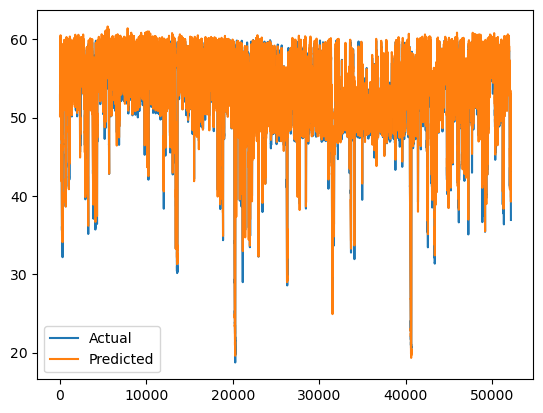

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from lightning.pytorch.callbacks import ModelCheckpoint, EarlyStopping, TQDMProgressBar
import lightning.pytorch as pl
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau

# Convert Pandas DataFrame to PyTorch Tensor
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=config['train_bs'], shuffle=False)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=config['valid_bs'], shuffle=False)

def quantile_loss(preds, targets, alpha=0.05):
    errors = targets - preds
    
    lower_quantile = torch.max((alpha - 1) * errors, alpha * errors).mean()
    upper_quantile = torch.max(((1 - alpha) - 1) * errors, (1 - alpha) * errors).mean()
    
    return lower_quantile + upper_quantile



# Define Neural Network
class LightningModule(pl.LightningModule):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.config = config
        self.layer1 = nn.Linear(input_dim, input_dim*2)
        self.layer2 = nn.Linear(input_dim*2, input_dim*2)
        # self.layer3 = nn.Linear(input_dim, input_dim)
        # self.layer4 = nn.Linear(input_dim, input_dim)
        self.layer5 = nn.Linear(input_dim*2, output_dim)
        # self.relu = nn.ReLU()
        self.relu = nn.LeakyReLU(0.3)
        # self.dropout = nn.Dropout(p=0.2)
        self.loss = nn.MSELoss()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        # x = self.dropout(x)
        x = self.relu(self.layer2(x))
        # x = self.dropout(x)
        x = self.relu(self.layer3(x))
        # x = self.dropout(x)
        x = self.relu(self.layer4(x))
        # x = self.dropout(x)
        x = self.layer5(x)
        return x

    def configure_optimizers(self):
        optimizer = AdamW(self.parameters())

        if self.config['model']["scheduler"]["name"] == "CosineAnnealingLR":
            scheduler = CosineAnnealingLR(
                optimizer,
                **self.config['model']["scheduler"]["params"][self.config['model']["scheduler"]["name"]],
            )
            lr_scheduler_dict = {"scheduler": scheduler, "interval": "step"}
            return {"optimizer": optimizer, "lr_scheduler": lr_scheduler_dict}
        elif self.config['model']["scheduler"]["name"] == "ReduceLROnPlateau":
            scheduler = ReduceLROnPlateau(
                optimizer,
                **self.config['model']["scheduler"]["params"][self.config['model']["scheduler"]["name"]],
            )
            lr_scheduler = {"scheduler": scheduler, "monitor": "val_loss"}
            return {"optimizer": optimizer, "lr_scheduler": lr_scheduler}

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = self.loss(y_hat, y)
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        for param_group in self.trainer.optimizers[0].param_groups:
            lr = param_group["lr"]
        self.log("lr", lr, on_step=False, on_epoch=True, prog_bar=True)
        logs = {"train_loss": loss, "lr": lr}
        return {"loss": loss, "log": logs}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = self.loss(y_hat, y)
        self.log("val_loss", loss, on_epoch=True, prog_bar=True)
        return {"val_loss": loss}


early_stop_callback = EarlyStopping(monitor="val_loss", mode="min", patience=8, verbose=1)
progress_bar_callback = TQDMProgressBar(refresh_rate=config["progress_bar_refresh_rate"])
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    mode="min",
    save_top_k=1,
    verbose=1,
    dirpath=config["output_dir"],
    filename="best_model",
)

from lightning.pytorch.loggers import TensorBoardLogger

logger = TensorBoardLogger("tb_logs", name="my_model")

trainer = pl.Trainer(
        callbacks=[early_stop_callback, progress_bar_callback, checkpoint_callback],
         logger=logger, **config["trainer"]
    )

# Train the model
model = LightningModule(X_train.shape[1], y_train.shape[1])
trainer.fit(model, train_loader, test_loader)

# Test the model
model.eval()
y_pred = model(X_test_tensor)
y_pred = y_pred.detach().numpy()
y_pred = scalery.inverse_transform(y_pred)

# Evaluate the model
from sklearn.metrics import mean_squared_error
from math import sqrt

# unscale the data
y_test = scalery.inverse_transform(y_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

# Plot the results
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


from pathlib import Path
# Save results
results_file = Path('results.csv')
results_df = pd.DataFrame(
    {
        'Model': 'Neural Network',
        'Training RMSE': trainer.logged_metrics['train_loss'].item(),
        'Validation RMSE': rmse,
        'Iterations': trainer.global_step,
        'Learning Rate': config['model']['optimizer_params']['lr'],
        'Depth': [X_train.shape[1], 64, 64, y_train.shape[1]],
        'Loss Function': 'MSE',
        'Features': ', '.join(cols),
    }
)

if results_file.exists():
    existing_df = pd.read_csv(results_file)
    results_df = pd.concat([existing_df, results_df])

results_df.to_csv(results_file, index=False)

In [ ]:
trainer.logged_metrics

{'val_loss': tensor(0.0067),
 'train_loss': tensor(0.0096),
 'lr': tensor(0.0005)}

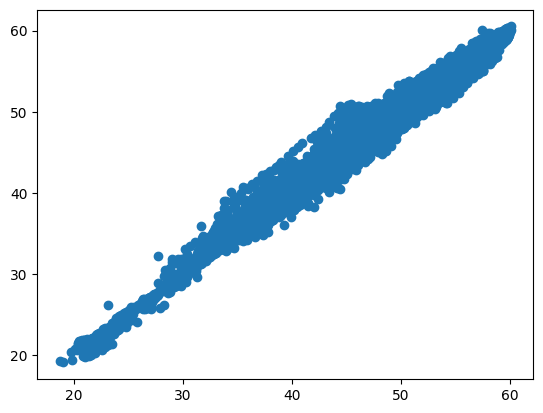

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
# load the best checkpoint
state_dict = torch.load(f'{config["output_dir"]}/best_model.ckpt')
model = LightningModule(X_train.shape[1], y_train.shape[1])
model.load_state_dict(state_dict['state_dict'])

# save the model
torch.save(model.state_dict(), f'{config["output_dir"]}/nn483.pt')

In [7]:
# load the model and make predictions
state_dict = torch.load(f'{config["output_dir"]}/best_model.ckpt')
model = LightningModule(X_train.shape[1], y_train.shape[1])
model.load_state_dict(state_dict['state_dict'])
model.eval()
y_pred = model(X_test_tensor)
y_pred = y_pred.detach().numpy()
y_pred = scaler.inverse_transform(y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

NameError: name 'torch' is not defined

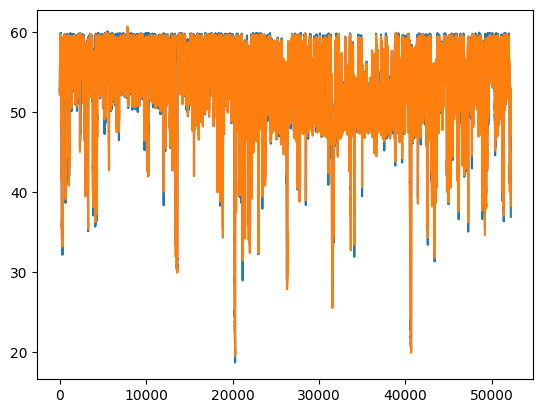

In [ ]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

In [ ]:
class LightningModule(pl.LightningModule):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.config = config
        self.layer1 = nn.Linear(input_dim, input_dim*2)
        self.layer2 = nn.Linear(input_dim*2, input_dim*2)
        self.layer3 = nn.Linear(input_dim*2, output_dim)
        # self.relu = nn.ReLU()
        self.relu = nn.LeakyReLU(0.3)
        # self.dropout = nn.Dropout(p=0.2)
        self.loss = nn.MSELoss()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        # x = self.dropout(x)
        x = self.relu(self.layer2(x))
        # x = self.dropout(x)
        x = self.layer3(x)
        return x

    def configure_optimizers(self):
        optimizer = AdamW(self.parameters())

        if self.config['model']["scheduler"]["name"] == "CosineAnnealingLR":
            scheduler = CosineAnnealingLR(
                optimizer,
                **self.config['model']["scheduler"]["params"][self.config['model']["scheduler"]["name"]],
            )
            lr_scheduler_dict = {"scheduler": scheduler, "interval": "step"}
            return {"optimizer": optimizer, "lr_scheduler": lr_scheduler_dict}
        elif self.config['model']["scheduler"]["name"] == "ReduceLROnPlateau":
            scheduler = ReduceLROnPlateau(
                optimizer,
                **self.config['model']["scheduler"]["params"][self.config['model']["scheduler"]["name"]],
            )
            lr_scheduler = {"scheduler": scheduler, "monitor": "val_loss"}
            return {"optimizer": optimizer, "lr_scheduler": lr_scheduler}

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = self.loss(y_hat, y)
        self.log("train_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        for param_group in self.trainer.optimizers[0].param_groups:
            lr = param_group["lr"]
        self.log("lr", lr, on_step=False, on_epoch=True, prog_bar=True)
        logs = {"train_loss": loss, "lr": lr}
        return {"loss": loss, "log": logs}

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = self.loss(y_hat, y)
        self.log("val_loss", loss, on_epoch=True, prog_bar=True)
        return {"val_loss": loss}